In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('weekly_data.csv')
df_yearly = pd.read_csv('yearly_data.csv')

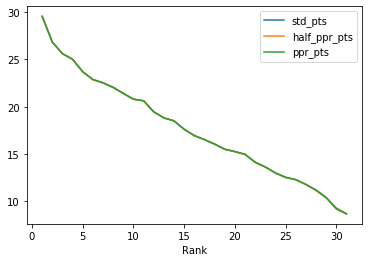

In [39]:
#QB 
df_qb = df_yearly[df_yearly['Position'] == 'QB']
df_qb_pts = df_qb.groupby('Rank').agg(std_pts = ('Average Standard Pts', np.mean), half_ppr_pts = ('Average Half PPR Pts', np.mean), ppr_pts = ('Average PPR Pts', np.mean))
df_qb_pts = df_qb_pts.iloc[0:31]
df_qb_pts['Position'] = 'QB'
df_qb_pts.plot()

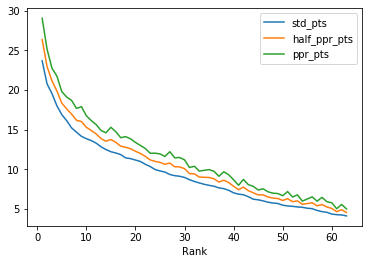

In [40]:
#RB 
df_rb = df_yearly[df_yearly['Position'] == 'RB']
df_rb_pts = df_rb.groupby('Rank').agg(std_pts = ('Average Standard Pts', np.mean), half_ppr_pts = ('Average Half PPR Pts', np.mean), ppr_pts = ('Average PPR Pts', np.mean))
df_rb_pts = df_rb_pts.iloc[0:63]
df_rb_pts['Position'] = 'RB'
df_rb_pts.plot()

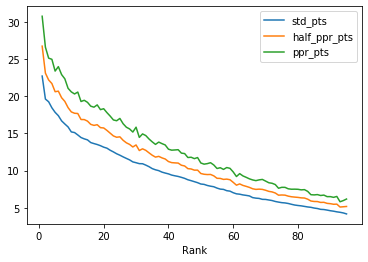

In [41]:
#WR
df_wr = df_yearly[df_yearly['Position'] == 'WR']
df_wr_pts = df_wr.groupby('Rank').agg(std_pts = ('Average Standard Pts', np.mean), half_ppr_pts = ('Average Half PPR Pts', np.mean), ppr_pts = ('Average PPR Pts', np.mean))
df_wr_pts = df_wr_pts.iloc[0:95]
df_wr_pts['Position'] = 'WR'
df_wr_pts.plot()

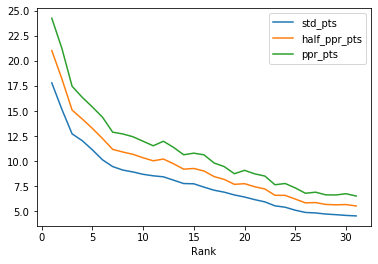

In [42]:
#TE
df_te = df_yearly[df_yearly['Position'] == 'TE']
df_te_pts = df_te.groupby('Rank').agg(std_pts = ('Average Standard Pts', np.mean), half_ppr_pts = ('Average Half PPR Pts', np.mean), ppr_pts = ('Average PPR Pts', np.mean))
df_te_pts = df_te_pts.iloc[0:31]
df_te_pts['Position'] = 'TE'
df_te_pts.plot()

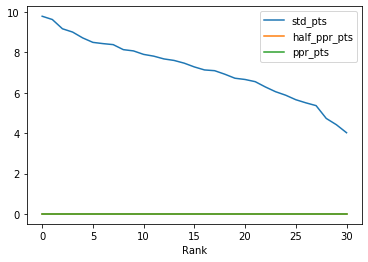

In [43]:
#K
df_k = df_yearly[df_yearly['Position'] == 'K']
df_k_pts = df_k.groupby('Rank').agg(std_pts = ('Average Standard Pts', np.mean), half_ppr_pts = ('Average Half PPR Pts', np.mean), ppr_pts = ('Average PPR Pts', np.mean))
df_k_pts = df_k_pts.iloc[0:31]
df_k_pts['Position'] = 'K'
df_k_pts.plot()

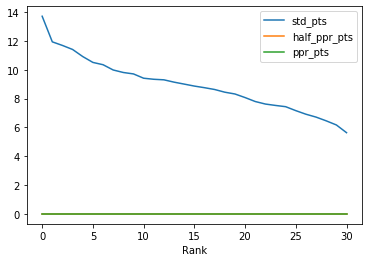

In [44]:
df_dst = df_yearly[df_yearly['Position'] == 'DST']
df_dst_pts = df_dst.groupby('Rank').agg(std_pts = ('Average Standard Pts', np.mean), half_ppr_pts = ('Average Half PPR Pts', np.mean), ppr_pts = ('Average PPR Pts', np.mean))
df_dst_pts = df_dst_pts.iloc[0:31]
df_dst_pts['Position'] = 'DST'
df_dst_pts.plot()

In [45]:
df_cat = pd.concat([df_qb_pts, df_rb_pts, df_wr_pts, df_te_pts, df_k_pts, df_dst_pts])

In [46]:
df_cat.to_csv('rank_data.csv')

In [47]:
TEAMS = df['Team'].unique()
YEARS = [2022]
POSITIONS = ["QB", "RB", "WR", "TE", "K", "DST"]

In [48]:
columns =  ['QB', 'RB1', 'RB2', 'WR1', 'WR2', 'WR3', 'TE', 'K', 'DST', 'OPP_QB', 'OPP_RB1', 'OPP_RB2', 'OPP_WR1', 'OPP_WR2', 'OPP_WR3', 'OPP_TE', 'OPP_K', 'OPP_DST']
df_corr = pd.DataFrame(columns = columns)


years = df['Year'].unique()
for year in years:
    if year >= 2022:
        end = 19
    else:
        end = 18
    df_new = df[df['Year'] == year]
    for week in range(1, end):  
        df_new = df_new[df_new['Week'] == week]
        for team in TEAMS:
            df_new = df[(df['Year']==year) & (df['Week']==week) & (df['Team']==team)] 
            if not df_new.empty:
                opp = df_new['Opponent'].unique()[0]
                df_new_opp = df[(df['Year']==year) & (df['Week']==week) & (df['Team']==opp)] 


                qb_pts = df_new[df_new['Position'] == 'QB']['PPR Pts'].sum()
                try:
                    rb_one_pts = df_new[df_new['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    rb_one_pts = 0
                try:
                    rb_two_pts = df_new[df_new['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    rb_two_pts = 0
                try:
                    wr_one_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    wr_one_pts = 0
                try:
                    wr_two_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    wr_two_pts = 0
                try:
                    wr_three_pts = df_new[df_new['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[2]
                except:
                    wr_three_pts = 0
                try:
                    te_one_pts = df_new[df_new['Position'] == 'TE'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    te_one_pts = 0
                k_pts = df_new[df_new['Position'] == 'K']['PPR Pts'].sum()
                dst_pts = df_new[df_new['Position'] == 'DST']['PPR Pts'].sum()



                opp_qb_pts = df_new_opp[df_new_opp['Position'] == 'QB']['PPR Pts'].sum()
                try:
                    opp_rb_one_pts = df_new_opp[df_new_opp['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    opp_rb_one_pts = 0
                try:
                    opp_rb_two_pts = df_new_opp[df_new_opp['Position'] == 'RB'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    opp_rb_two_pts = 0
                try:
                    opp_wr_one_pts = df_new_opp[df_new_opp['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    opp_wr_one_pts = 0
                try:
                    opp_wr_two_pts = df_new_opp[df_new_opp['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[1]
                except:
                    opp_wr_two_pts = 0
                try:
                    opp_wr_three_pts = df_new_opp[df_new_opp['Position'] == 'WR'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[2]
                except:
                    opp_wr_three_pts = 0
                try:
                    opp_te_one_pts = df_new_opp[df_new_opp['Position'] == 'TE'].sort_values(by=['PPR Pts'], ascending = False)['PPR Pts'].iloc[0]
                except:
                    opp_te_one_pts = 0
                opp_k_pts = df_new_opp[df_new_opp['Position'] == 'K']['PPR Pts'].sum()
                opp_dst_pts = df_new_opp[df_new_opp['Position'] == 'DST']['PPR Pts'].sum()

                line = [qb_pts,rb_one_pts,rb_two_pts,wr_one_pts,wr_two_pts,wr_three_pts,te_one_pts,k_pts,dst_pts, opp_qb_pts,opp_rb_one_pts,opp_rb_two_pts,opp_wr_one_pts,opp_wr_two_pts,opp_wr_three_pts,opp_te_one_pts,opp_k_pts,opp_dst_pts]
                df_corr.loc[len(df_corr)] = line   

In [49]:
df_corr.corr()

,QB,RB1,RB2,WR1,WR2,WR3,TE,K,DST,OPP_QB,OPP_RB1,OPP_RB2,OPP_WR1,OPP_WR2,OPP_WR3,OPP_TE,OPP_K,OPP_DST
QB,1.000000,0.113366,0.056176,0.477242,0.431103,0.311148,0.295074,0.122901,-0.041291,0.037923,0.038727,-0.028984,0.140856,0.134866,0.141104,0.086243,-0.071064,-0.448797
RB1,0.113366,1.000000,0.208797,0.010577,-0.033559,-0.046939,-0.024751,0.101232,0.006647,0.038727,-0.075882,-0.082112,0.044091,0.023973,0.017396,0.026865,-0.060559,-0.232853
RB2,0.056176,0.208797,1.000000,-0.050571,-0.060557,-0.043377,-0.016446,0.024586,0.030624,-0.028984,-0.082112,-0.116710,-0.027951,-0.077066,-0.045813,-0.010942,-0.086547,-0.124864
WR1,0.477242,0.010577,-0.050571,1.000000,0.525682,0.261928,-0.013853,0.115507,-0.089768,0.140856,0.044091,-0.027951,0.088448,0.090241,0.041403,0.072313,0.016188,-0.203740
WR2,0.431103,-0.033559,-0.060557,0.525682,1.000000,0.568335,-0.035436,0.090437,-0.091069,0.134866,0.023973,-0.077066,0.090241,0.059136,0.020915,0.075417,0.022373,-0.131245
WR3,0.311148,-0.046939,-0.043377,0.261928,0.568335,1.000000,-0.009461,0.071968,-0.102411,0.141104,0.017396,-0.045813,0.041403,0.020915,-0.010252,0.037720,0.022945,-0.060939
TE,0.295074,-0.024751,-0.016446,-0.013853,-0.035436,-0.009461,1.000000,0.037995,-0.104591,0.086243,0.026865,-0.010942,0.072313,0.075417,0.037720,-0.028968,0.005624,-0.087443
K,0.122901,0.101232,0.024586,0.115507,0.090437,0.071968,0.037995,1.000000,0.213487,-0.071064,-0.060559,-0.086547,0.016188,0.022373,0.022945,0.005624,-0.258954,-0.327381
DST,-0.041291,0.006647,0.030624,-0.089768,-0.091069,-0.102411,-0.104591,0.213487,1.000000,-0.448797,-0.232853,-0.124864,-0.203740,-0.131245,-0.060939,-0.087443,-0.327381,-0.286360
OPP_QB,0.037923,0.038727,-0.028984,0.140856,0.134866,0.141104,0.086243,-0.071064,-0.448797,1.000000,0.113366,0.056176,0.477242,0.431103,0.311148,0.295074,0.122901,-0.041291


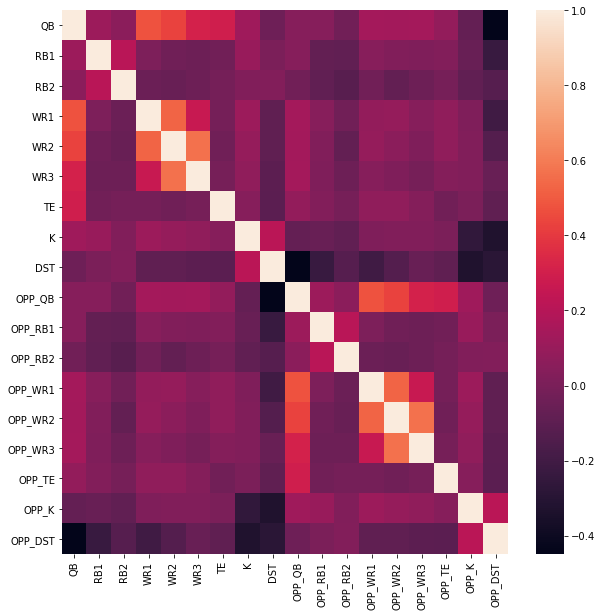

In [50]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df_corr.corr())

In [51]:
df_corr_reshaped = df_corr.corr().stack().reset_index()

df_corr_reshaped.columns = ['Position_1', 'Position_2', 'Correlation']

mask_dups = (df_corr_reshaped[['Position_1', 'Position_2']].apply(frozenset, axis=1).duplicated()) | (df_corr_reshaped['Position_1']==df_corr_reshaped['Position_2']) 

df_corr_reshaped = df_corr_reshaped[~mask_dups]

df_corr_reshaped

,Position_1,Position_2,Correlation
1,QB,RB1,0.113366
2,QB,RB2,0.056176
3,QB,WR1,0.477242
4,QB,WR2,0.431103
5,QB,WR3,0.311148
...,...,...,...
268,OPP_WR3,OPP_K,0.071968
269,OPP_WR3,OPP_DST,-0.102411
286,OPP_TE,OPP_K,0.037995
287,OPP_TE,OPP_DST,-0.104591


In [52]:
df_corr_reshaped.to_csv('correlation_matrix.csv')